# Parking Lot Image Analysis and Preprocessing

This notebook is designed to analyze, preprocess, and visualize parking lot images for machine learning tasks. It includes functionalities for dataset exploration, image augmentation, quality checks, and filtering techniques. The workflow is structured to ensure reproducibility and clarity.

## Instructions
1. **Project Path**: Update the `project_path` and `dataset_path` variable in the notebook to match your project directory. This is essential for accessing datasets, fonts, and saving outputs.
2. **Google Colab**: If you are using Google Colab, ensure that your Google Drive is mounted, and the `project_path` is set accordingly. For example:
    ```python
    from google.colab import drive
    drive.mount('/content/drive')
    project_path = '/content/drive/MyDrive/your_project_directory'
    ```

## Key Features
- **Dataset Analysis**: Visualizes image properties such as format, size, and mode for both empty and not-empty parking lot datasets.
- **Class Distribution**: Counts and plots the number of samples per class (empty vs. not-empty).
- **Quality Checks**: Identifies low-quality and duplicate images.
- **Image Preprocessing**: Includes resizing, rotation, flipping, brightness adjustment, and noise addition.
- **Filtering Techniques**: Applies median filtering, Gaussian blur, denoising, sharpening, and edge detection to images.

## Results
- The notebook generates various plots and processed images to help understand the dataset and its characteristics.
- Outputs are saved in the `images` directory within the project path for easy access and review.
- Insights from the analysis can guide further steps in model training and dataset refinement.

In [236]:
# ------------------------------
# Standard Library Imports
# ------------------------------
import os
import random
import hashlib

# ------------------------------
# Image and Visualization Libraries
# ------------------------------
from PIL import Image, ImageStat
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.font_manager as font_manager
from scipy.ndimage import median_filter
import cv2

# ------------------------------
# Data Analysis Libraries
# ------------------------------
import pandas as pd
import numpy as np

# ------------------------------
# Machine Learning Library
# ------------------------------
import tensorflow as tf

In [237]:
# Project path
project_path = '/content/drive/MyDrive/parkinglot_project'

In [238]:
# Dataset paths in google drive
dataset_path = os.path.join(project_path, 'dataset/clf-data')
empty_path = os.path.join(dataset_path, 'empty')
not_empty_path = os.path.join(dataset_path, 'not_empty')

In [239]:
# ==============================
# Directory Setup
# ==============================

# Define the directory name for saving images
OUTPUT_DIR = os.path.join(project_path, 'images')

# Check if the directory exists, if not, create it
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

# ==============================
# Plot Styling & Customization
# ==============================

# Set a Minimalist Style
sns.set_style("whitegrid")

# Customize Matplotlib settings for a modern look
mpl.rcParams.update({
    'axes.edgecolor': 'grey',
    'axes.labelcolor': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'text.color': 'black'
})

# ==============================
# Font Configuration
# ==============================

# Path to the custom font file
FONT_PATH = os.path.join(project_path, 'fonts/Montserrat-Regular.ttf')

# Add the font to matplotlib's font manager
font_manager.fontManager.addfont(FONT_PATH)

# Set the font family to Montserrat
plt.rcParams['font.family'] = 'Montserrat'

In [240]:
def analyze_and_plot_images(folder_path):
    """
    Analyzes images in a folder and generates plots to visualize their properties.

    Parameters:
        -folder_path (str): The path to the folder containing the images.
        -word (str): A descriptive word related to the images
                     used in the plot title.

    Returns:
        None: The function displays the plots but does not return any value.
    """

    # Get list of image files in the folder
    image_files = [f for f in os.listdir(folder_path)
                   if f.lower().endswith(('.png', '.jpg', '.jpeg', '.webp', '.bmp', '.gif'))]

    if not image_files:
        print("No images found in the folder.")
        return

    # Initialize lists to store image properties
    formats = []
    sizes = []
    modes = []

    # Analyze each image
    for img_file in image_files:
        img_path = os.path.join(folder_path, img_file)
        img = Image.open(img_path)

        # Collect image properties
        formats.append(img.format)
        sizes.append(img.size)  # (width, height)
        modes.append(img.mode)  # RGB, L (grayscale)

    # Create a DataFrame to organize the data
    df = pd.DataFrame({
        'Format': formats,
        'Size': sizes,
        'Mode': modes
    })

    # Create a grid of subplots
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))

    # Set the title for the entire figure (grid of plots)
    fig.suptitle(f'Dataset Analysis for {os.path.basename(os.path.normpath(folder_path))} Parkings', fontsize=16)

    # Plot the number of images per format
    format_counts = df['Format'].value_counts()
    axs[0, 0].bar(format_counts.index, format_counts.values, color='skyblue')
    axs[0, 0].set_title('Image Format Distribution')
    axs[0, 0].set_xlabel('Format')
    axs[0, 0].set_ylabel('Count')
    axs[0, 0].tick_params(axis='x')

    # Plot the number of images per mode (e.g., RGB, L)
    mode_counts = df['Mode'].value_counts()
    axs[0, 1].bar(mode_counts.index, mode_counts.values, color='lightgreen')
    axs[0, 1].set_title('Image Mode Distribution')
    axs[0, 1].set_xlabel('Mode')
    axs[0, 1].set_ylabel('Count')
    axs[0, 1].tick_params(axis='x')

    # Plot the distribution of image sizes (width and height)
    df['Width'] = df['Size'].apply(lambda x: x[0])
    df['Height'] = df['Size'].apply(lambda x: x[1])

    # Plot width distribution
    axs[1, 0].hist(df['Width'], bins=5, color='lightcoral', edgecolor='black')
    axs[1, 0].set_title('Width Distribution')
    axs[1, 0].set_xlabel('Width (px)')
    axs[1, 0].set_ylabel('Count')

    # Plot height distribution
    axs[1, 1].hist(df['Height'], bins=5, color='lightblue', edgecolor='black')
    axs[1, 1].set_title('Height Distribution')
    axs[1, 1].set_xlabel('Height (px)')
    axs[1, 1].set_ylabel('Count')

    plt.savefig(os.path.join(OUTPUT_DIR, f"dataset_analysis_for_{os.path.basename(os.path.normpath(folder_path))}_parkings.png"),
                bbox_inches='tight',
                facecolor='none',
                transparent=True)

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

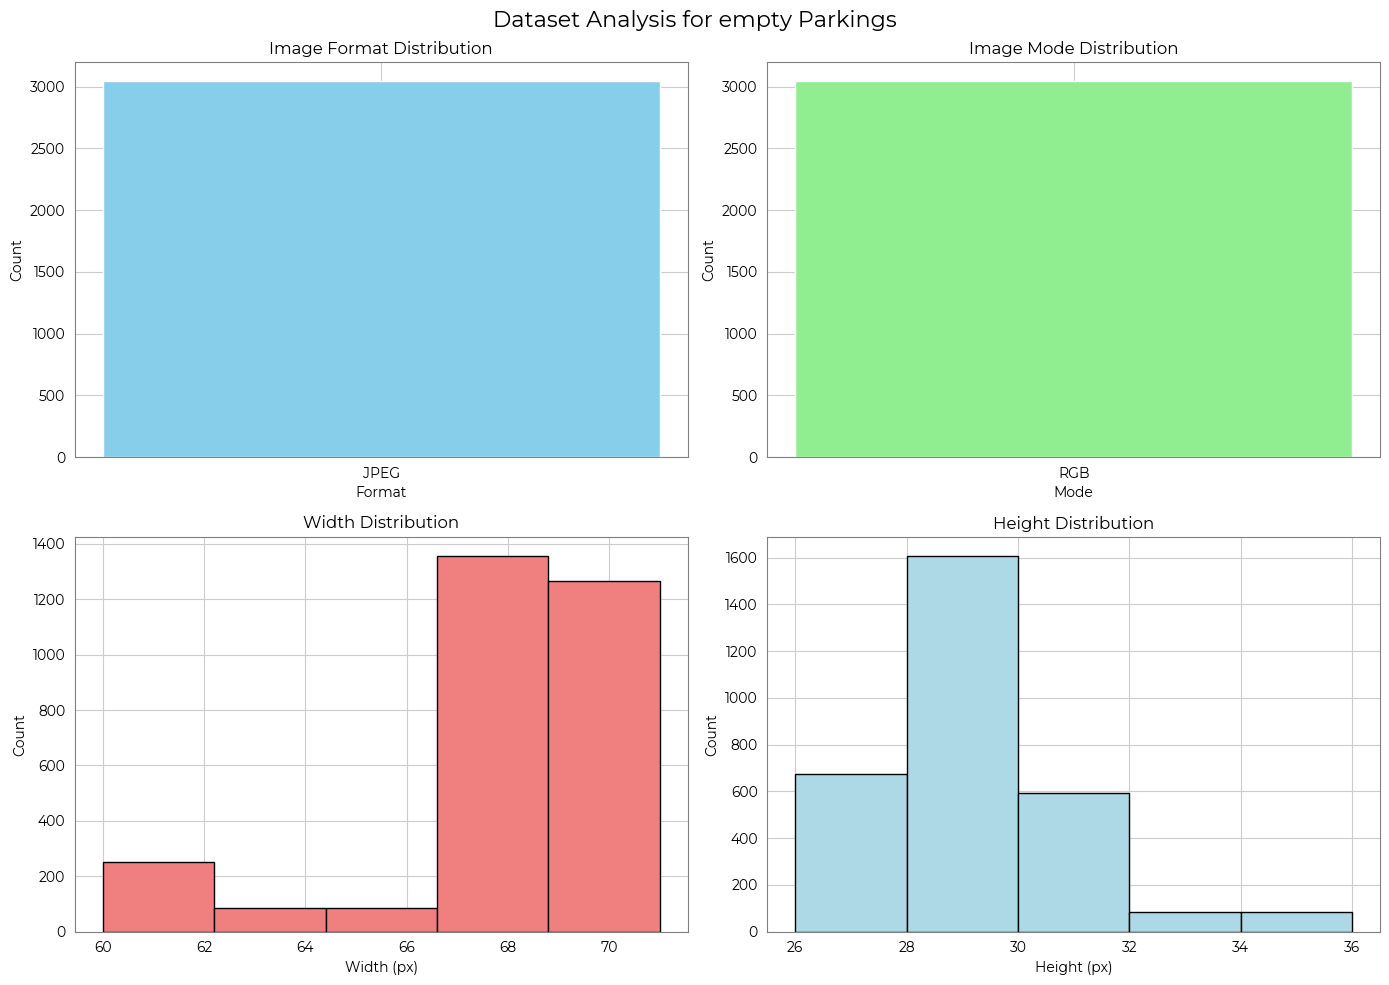

In [241]:
# Plots of image poroperties for the empty parking data
analyze_and_plot_images(empty_path)

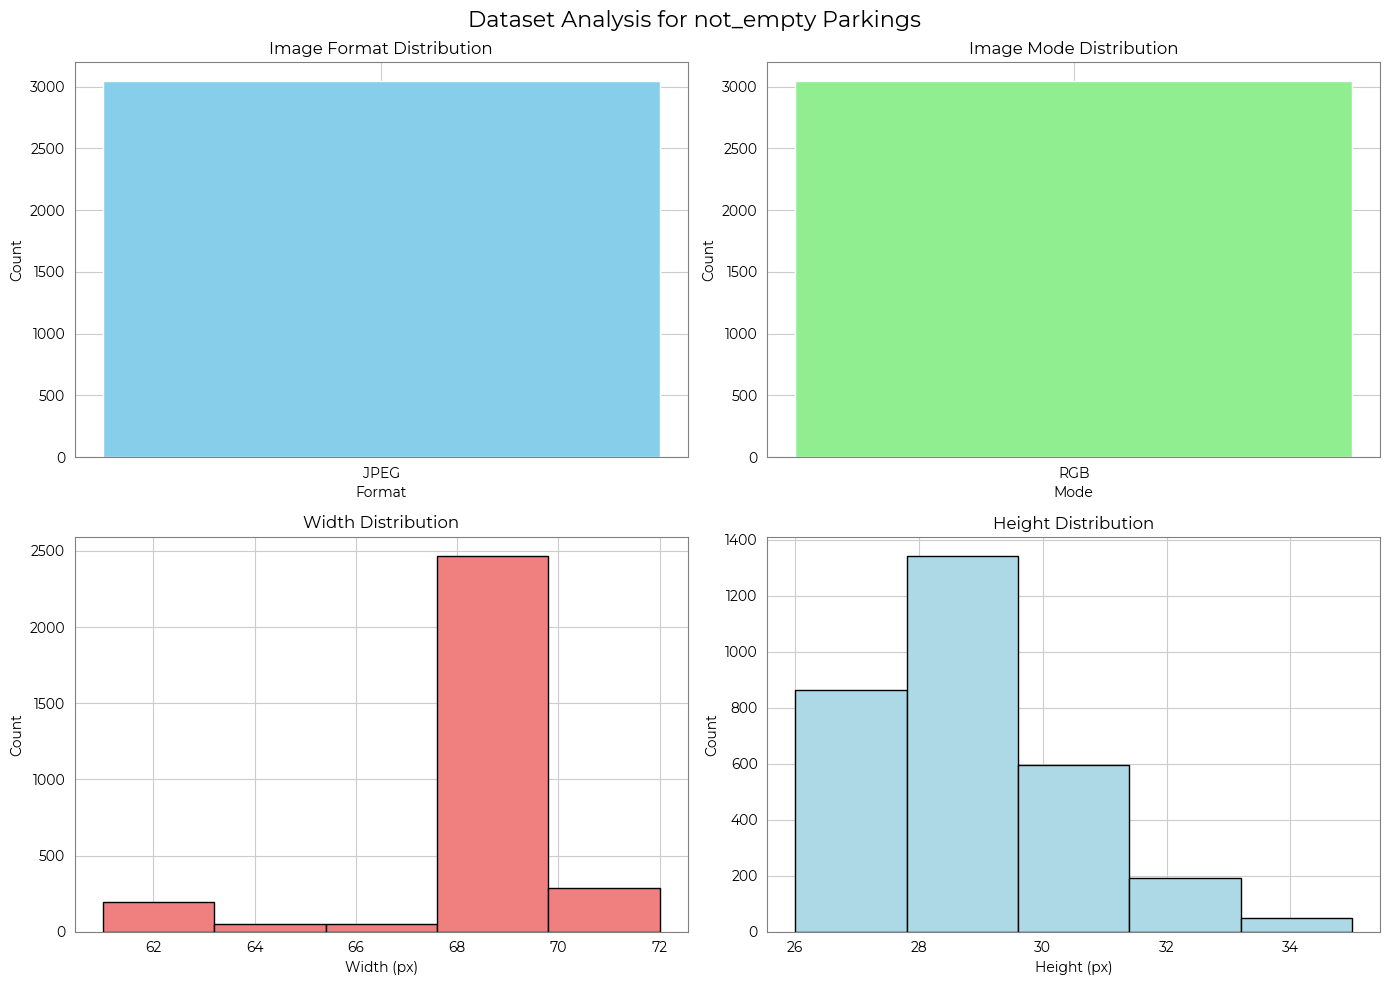

In [242]:
# Plots of image poroperties for the not-empty parking data
analyze_and_plot_images(not_empty_path)

In [243]:
def count_samples_per_class(dataset_folder):
    """
    Count number of image files per class (subfolder) and plot distribution.

    Parameters:
        - dataset_folder (str): Path to dataset with subfolders as class names.

    Returns:
        None: The function displays the plot but does not return any value.
    """

    class_counts = {}

    # Loop over the path inside the folder
    for class_name in os.listdir(dataset_folder):
        class_path = os.path.join(dataset_folder, class_name)
        if os.path.isdir(class_path):
            count = len([f for f in os.listdir(class_path)
            if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp',
                                   '.gif', '.webp'))])
            class_counts[class_name] = count

    # Create a DataFrame
    df = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Sample Count'])
    df = df.sort_values(by='Sample Count', ascending=False)

    df['Class'] = df['Class'].apply(lambda x: x.replace('_', ' ').title())

    # Plot the class distribution
    plt.figure(figsize=(10, 6))
    plt.bar(df['Class'], df['Sample Count'], color='cornflowerblue', edgecolor='black')
    plt.title('Class Distribution')
    plt.xlabel('Class')
    plt.ylabel('Number of Samples')

    plt.savefig(os.path.join(OUTPUT_DIR, f"class_distribution.png"),
                bbox_inches='tight',
                facecolor='none',
                transparent=True)

    plt.tight_layout()
    plt.show()


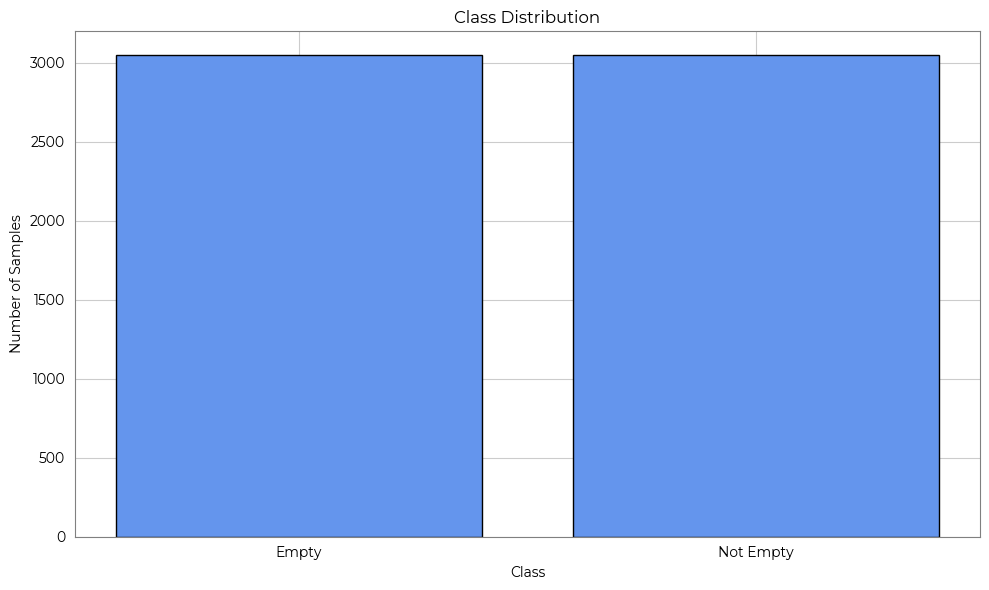

In [244]:
# Count sample per class
count_samples_per_class(dataset_path)

In [245]:
def is_low_quality(img_path):
    """
    Check if an image is low-quality (dark or bright).

    Parameters:
        - img_path (str): Path to the image file.

    Returns:
        - bool: True if the image is low-quality, False otherwise.
    """

    # Converts the image to gray sclae
    img = Image.open(img_path).convert('L')
    stat = ImageStat.Stat(img)
    mean = stat.mean[0]

    return mean < 25 or mean > 230  # very dark or very bright

def hash_img(path):
    """
    Calculate the MD5 hash of an image file.

    Parameters:
        - path (str): Path to the image file.

    Returns:
        - str: MD5 hash of the image file.
    """

    with open(path, 'rb') as f:
        return hashlib.md5(f.read()).hexdigest()

In [246]:
# Let's loop over all the images to look for low quality and duplicated images
low_quality_images = []
hashes = {}
duplicates = []

# Loop over all the images
for class_name in ['empty', 'not_empty']:
    class_path = os.path.join(dataset_path, class_name)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        if is_low_quality(img_path):
            low_quality_images.append(img_path)
        img_hash = hash_img(img_path)
        if img_hash in hashes:
            duplicates.append((img_path, hashes[img_hash]))
        else:
            hashes[img_hash] = img_path

print(f"Found {len(low_quality_images)} low-quality images")
print(f"Found {len(duplicates)} duplicate image pairs")

Found 0 low-quality images
Found 0 duplicate image pairs


In [247]:
def preprocess_image(image_path, target_size=(224, 224),
                     apply_rotation=False, apply_flip=False, apply_brightness=False,
                     apply_noise=False, delta = 0.2, noise_std=0.05):
    """
    Preprocess the image: resize, normalize if needed, and apply optional augmentations.

    Parameters:
        - image_path (str): Path to the image file.
        - target_size (tuple): Target size (width, height) for resizing.
        - apply_rotation (bool): Apply random 90-degree rotation.
        - apply_flip (bool): Apply random horizontal flip.
        - apply_brightness (bool): Apply random brightness adjustment.
        - apply_noise (bool): Apply random Gaussian noise.
        - delta (float): The brightness adjustment delta.
        - noise_std (float): The standard deviation of Gaussian noise.

    Returns:
        - np.array: Preprocessed image as a numpy array.
    """
    # Open the image
    img = Image.open(image_path)

    # Resize
    img = img.resize(target_size)

    # Convert to np.array
    img_np = np.array(img)


    # Data Augmentation
    if apply_rotation:
        img_nor = img_np / 255.0
        img_tensor = tf.convert_to_tensor(img_nor, dtype=tf.float32)
        img_tensor = tf.image.rot90(img_tensor)
        img_nor = img_tensor.numpy()
        img_nor = np.clip(img_nor, 0.0, 1.0)
        img_np = (img_nor * 255).astype(np.uint8)

    if apply_flip:
        img_np = np.fliplr(img_np)

    if apply_brightness:
        img_nor = img_np / 255.0
        img_tensor = tf.convert_to_tensor(img_nor, dtype=tf.float32)
        img_tensor = tf.image.adjust_brightness(img_tensor, delta=delta)
        img_nor = img_tensor.numpy()
        img_nor = np.clip(img_nor, 0.0, 1.0)
        img_np = (img_nor * 255).astype(np.uint8)

    if apply_noise:
        # Apply Gaussian noise to the image
        img_nor = img_np / 255.0
        random.seed(42)
        noise = np.random.normal(loc=0.0, scale=noise_std, size=img_nor.shape).astype(int)
        img_nor = img_nor + noise
        img_nor = np.clip(img_nor, 0.0, 1.0)
        img_np = (img_nor * 255).astype(np.uint8)

    return img_np

In [250]:
def visualize_preprocessed_images(image_folder, sample_size=6, target_size=(224, 224),
                                  apply_rotation=False, apply_flip=False, apply_brightness=False,
                                  apply_noise=False, delta=0.2, noise_std=0.05):
    """
    Visualize preprocessed images.

    Parameters:
        - image_folder (str): Folder with images.
        - sample_size (int): Number of images to display.
        - target_size (tuple): Target size for image resizing.
        - apply_rotation (bool): Apply random 90-degree rotation.
        - apply_flip (bool): Apply random horizontal flip.
        - apply_brightness (bool): Apply random brightness adjustment.

    Returns:
        None: The function displays the images but does not return any value.
    """
    image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.webp'))]
    random.seed(42)
    sample_files = random.sample(image_files, sample_size)

    fig, axes = plt.subplots(2, 3, figsize=(15, 15))

    for ax, img_file in zip(axes.flatten(), sample_files):
        img_path = os.path.join(image_folder, img_file)
        img_np = preprocess_image(img_path, target_size,
                               apply_rotation=apply_rotation,
                               apply_flip=apply_flip,
                               apply_brightness=apply_brightness,
                               delta=delta,
                               apply_noise=apply_noise,
                               noise_std=noise_std  )
        ax.imshow(img_np)
        ax.axis('off')

    if apply_rotation:
        title = 'With Rotation'
    elif apply_flip:
        title = 'With Flip'
    elif apply_brightness:
        title = f'With Brightness of {delta}'
    elif apply_noise:
        title = f'With Noise (std={noise_std})'
    else:
        title = 'Not Augmentations'

    fig.suptitle(f"{os.path.basename(os.path.normpath(image_folder)).title()} Parkins Images Resize to {target_size} and {title}", fontsize=16)

    # Convert target_size to string and replace characters as intended
    target_size_str = str(target_size).replace('(', '').replace(')', '').replace(', ', 'X')

    plt.savefig(os.path.join(OUTPUT_DIR, f"{os.path.basename(os.path.normpath(image_folder)).title()}_parkins_images_resize_to_{target_size_str}_and_{title.lower().replace(' ','_')}.png"),
                bbox_inches='tight',
                facecolor='none',
                transparent=True)

    plt.show()
    print(f'{"*"*153}')

In [251]:
# Resize
sizes = [(32, 32), (64, 64), (126, 126), (224, 224), (256, 256), (299, 299)]

for size in sizes:
  visualize_preprocessed_images(image_folder=not_empty_path, target_size=size)

# Only apply rotation
visualize_preprocessed_images(image_folder=not_empty_path, apply_rotation=True)

# Only flipping
visualize_preprocessed_images(image_folder=not_empty_path, apply_flip=True)


Output hidden; open in https://colab.research.google.com to view.

In [252]:
# Apply brigthness
deltas = [0.01, 0.05, 0.1, 0.2, 0.3, -0.01, -0.05, -0.1, -0.2, -0.3]

for delta in deltas:
  visualize_preprocessed_images(image_folder=not_empty_path, apply_brightness=True, delta=delta)

Output hidden; open in https://colab.research.google.com to view.

In [253]:
# Apply noise
noise_std = [0.01, 0.05, 0.1, 0.15, 0.2, 0.25]

for noise in noise_std:
  visualize_preprocessed_images(image_folder=not_empty_path, apply_noise=True, noise_std=noise)

Output hidden; open in https://colab.research.google.com to view.

In [254]:
def process_image(img_path):
    """
    Process an image by applying various filtering techniques:
    median filtering, Gaussian blur, non-local means denoising,
    sharpening (using unsharp mask), and edge detection.

    Parameters:
        -img_path (str): The file path to the image to be processed.

    Returns:
        -tuple: A tuple containing the following images:
            - Median Filtered Image (Scipy)
            - Gaussian Blurred Image (OpenCV)
            - Denoised Image (OpenCV)
            - Sharpened Image (Unsharp Mask)
            - Edge Detection Image (Canny)

    The function processes the image in the following order:
        1. **Median Filtering**: Applied on each RGB channel separately.
        2. **Gaussian Blur**: Applied using OpenCV.
        3. **Non-Local Means Denoising**: Applied using OpenCV.
        4. **Sharpening (Unsharp Mask)**: Sharpen the image using Gaussian blur and weighted addition.
        5. **Edge Detection (Canny)**: Detect edges using Canny edge detector on the grayscale version.
    """

    # Open and resize the image
    img = Image.open(img_path)
    img = img.resize((224, 224))
    img = np.array(img)

    # Convert to grayscale for edge detection (optional but useful for clarity)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Median Filter (Scipy)

    noisy_data = np.array(img)

    red = noisy_data[:, :, 0]
    green = noisy_data[:, :, 1]
    blue = noisy_data[:, :, 2]

    data_filtered = noisy_data.copy()

    # red channel:
    data_filtered[:, :, 0] = median_filter(red, size=1)

    # green channel:
    data_filtered[:, :, 1] = median_filter(green, size=1)

    # blue channel:
    data_filtered[:, :, 2] = median_filter(blue, size=1)

    # Apply Gaussian Blur (OpenCV)
    gaussian_blurred = cv2.GaussianBlur(img, (5, 5), 0)

    # Apply Non-Local Means Denoising (OpenCV)
    denoised = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)

    # Apply Sharpening using Unsharp Mask
    blurred = cv2.GaussianBlur(denoised, (5, 5), 0)
    sharpened = cv2.addWeighted(denoised, 1.5, blurred, -0.5, 0)

    # Apply Edge Detection (Canny)
    edges = cv2.Canny(gray_img, 100, 200)

    return data_filtered, gaussian_blurred, denoised, sharpened, edges

def visualize_image_grid(img_path):
    """
    Visualizes an image along with its processed versions (Median Filter, Gaussian Blur,
    Denoising, Sharpening, and Edge Detection) in a 2x3 grid. Each image processing technique
    is displayed with its corresponding title.

    Parameters:
        img_path (str): The file path to the image to be processed and visualized.

    Returns:
        None: This function displays a grid of images showing the original image and its processed versions.
    """

    # Process the image
    median_filtered, gaussian_blurred, denoised, sharpened, edges = process_image(img_path)

    # Plotting the images in a grid
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()

    # Open and resize the original image
    img = Image.open(img_path)
    img = img.resize((224, 224))

    # Show each image in the grid
    images = [img, median_filtered, gaussian_blurred, denoised, sharpened, edges]
    titles = ['Original Image', 'Median Filtered (Scipy)', 'Gaussian Blur (OpenCV)',
              'Denoised Image (OpenCV)', 'Sharpened Image (Unsharp Mask)', 'Edge Detection (Canny)']

    # Display each image in the grid
    for ax, image, title in zip(axes, images, titles):
        ax.imshow(image)
        ax.axis('off')
        ax.set_title(title)

    plt.savefig(os.path.join(OUTPUT_DIR, f"image_{os.path.basename(os.path.normpath(img_path)).title()}_processed.png"),
                bbox_inches='tight',
                facecolor='none',
                transparent=True)

    plt.tight_layout()
    plt.show()

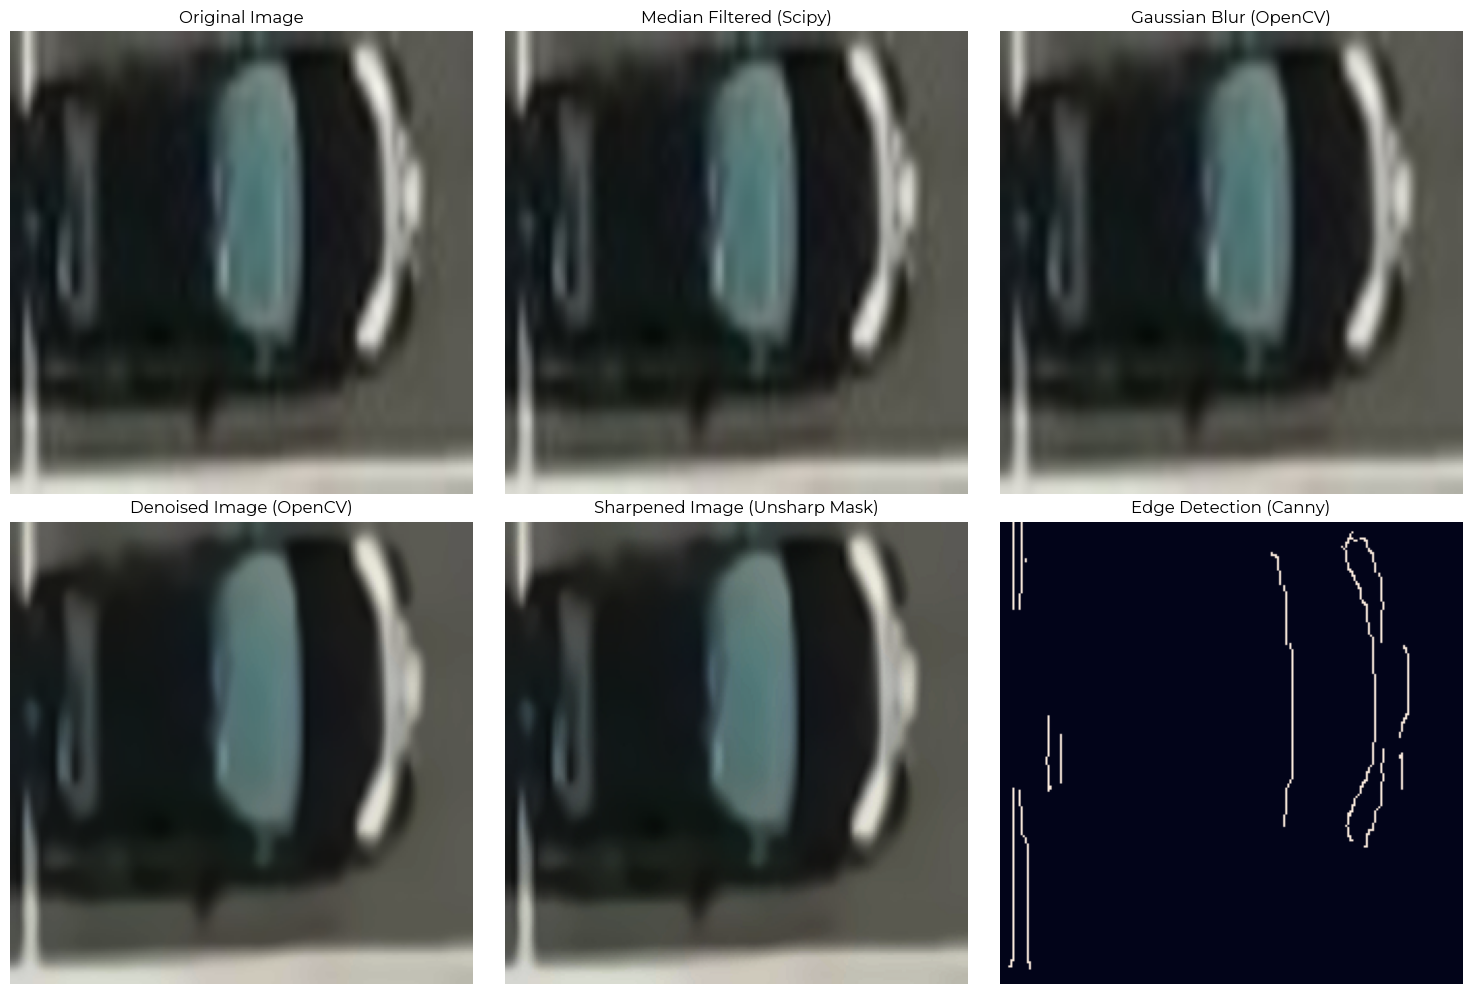

In [255]:
# Choosing a random image
image_files = [f for f in os.listdir(not_empty_path) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.webp'))]

sample_files = random.sample(image_files, 1)
sample = sample_files[0]
img_path = os.path.join(not_empty_path, sample)

# Processing the image
visualize_image_grid(img_path)